In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from google.colab import drive
drive.mount('/content/drive/')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive/


In [ ]:
path = "drive/Shared drives/BANA CAPSTONE/Final data preps/"
df1 = pd.read_csv(path+'MergedFromRDS.csv',encoding= 'unicode_escape') 
df1.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6,10,11,19,46,51,52,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Date,Activity,Event Name,F&B,Retail.x,CR,Revenue,Attd.,F&B PC,...,...32,...33,Team,Location,Stand Type,Service Style,Branded/Non-Branded,Retail.y,Section,Concept
0,1,2021-09-09,CONCT,Blake Shelton,263509.53,16684.34,3893.17,284087.04,12003.0,21.953639,...,NaN,NaN,Nashville Predators,Concessions,Bar,Standard,Branded,No,NaN,NaN
1,2,2021-09-09,CONCT,Blake Shelton,263509.53,16684.34,3893.17,284087.04,12003.0,21.953639,...,NaN,NaN,Nashville Predators,Concessions,Bar,Standard,Branded,No,NaN,NaN
2,3,2021-09-09,CONCT,Blake Shelton,263509.53,16684.34,3893.17,284087.04,12003.0,21.953639,...,NaN,NaN,Nashville Predators,Concessions,Bar,Standard,Branded,No,NaN,NaN
3,4,2021-09-09,CONCT,Blake Shelton,263509.53,16684.34,3893.17,284087.04,12003.0,21.953639,...,NaN,NaN,Nashville Predators,Concessions,Bar,Standard,Branded,No,NaN,NaN
4,5,2021-09-09,CONCT,Blake Shelton,263509.53,16684.34,3893.17,284087.04,12003.0,21.953639,...,NaN,NaN,Nashville Predators,Concessions,Bar,Standard,Branded,No,NaN,NaN


In [ ]:
df1.dtypes

Unnamed: 0                   int64
Date                        object
Activity                    object
Event Name                  object
F&B                        float64
Retail.x                    object
CR                          object
Revenue                    float64
Attd.                      float64
F&B PC                     float64
Ret PC                      object
CR PC                       object
Total PC                   float64
TH_Loc                      object
location_id                 object
cost_center_name            object
source_system               object
item_name                   object
item_id                    float64
is_tax_exempt               object
qty                          int64
amount                     float64
Transaction Check            int64
Price                      float64
Item Cost                   object
Season                      object
Event - Type Category       object
Event - Category            object
Game Tier           

In [ ]:
print('***************Shape:\n')
print(df1.shape)
print('\n***************Columns:\n')
print(df1.columns)
print('\n***************Data description:\n')
print(df1.describe())

***************Shape:

(840893, 54)

***************Columns:

Index(['Unnamed: 0', 'Date', 'Activity', 'Event Name', 'F&B', 'Retail.x', 'CR',
       'Revenue', 'Attd.', 'F&B PC', 'Ret PC', 'CR PC', 'Total PC', 'TH_Loc',
       'location_id', 'cost_center_name', 'source_system', 'item_name',
       'item_id', 'is_tax_exempt', 'qty', 'amount', 'Transaction Check',
       'Price', 'Item Cost', 'Season', 'Event - Type Category',
       'Event - Category', 'Game Tier', 'Location - Category',
       'Location - Sub-Category', 'Location - Concept', 'Location - Brand',
       'Product - Cat 0', 'Product - Cat 1', 'Product - Cat 2',
       'Product - Cat 3', 'Product - Cat 4', '...26', '...27', '...28',
       '...29', '...30', '...31', '...32', '...33', 'Team', 'Location',
       'Stand Type', 'Service Style', 'Branded/Non-Branded', 'Retail.y',
       'Section', 'Concept'],
      dtype='object')

***************Data description:

          Unnamed: 0           F&B       Revenue          Attd. 

In [ ]:
print(df1.nunique())

Unnamed: 0                 840893
Date                          241
Activity                       25
Event Name                    201
F&B                           352
Retail.x                      308
CR                            329
Revenue                       352
Attd.                         349
F&B PC                        350
Ret PC                        305
CR PC                         329
Total PC                      350
TH_Loc                          5
location_id                     7
cost_center_name              810
source_system                   5
item_name                   13415
item_id                     16099
is_tax_exempt                   2
qty                           803
amount                      11681
Transaction Check               2
Price                        7154
Item Cost                       1
Season                          1
Event - Type Category           1
Event - Category                1
Game Tier                       1
Location - Cat

In [ ]:
df1.isnull().sum()  # Finding null values for each column

Unnamed: 0                      0
Date                            0
Activity                     2730
Event Name                    314
F&B                             0
Retail.x                        0
CR                              0
Revenue                         0
Attd.                       13222
F&B PC                      13222
Ret PC                      13222
CR PC                       13222
Total PC                    13222
TH_Loc                          0
location_id                     0
cost_center_name                0
source_system                   0
item_name                       0
item_id                         0
is_tax_exempt              445787
qty                             0
amount                          0
Transaction Check               0
Price                           0
Item Cost                       0
Season                          0
Event - Type Category           0
Event - Category                0
Game Tier                       0
Location - Cat

In [ ]:
print(df1.groupby('source_system')['item_id'].agg('count'))


source_system
appetize        445787
halo             22861
micros           56958
micros_cloud    203849
netsuite        111438
Name: item_id, dtype: int64


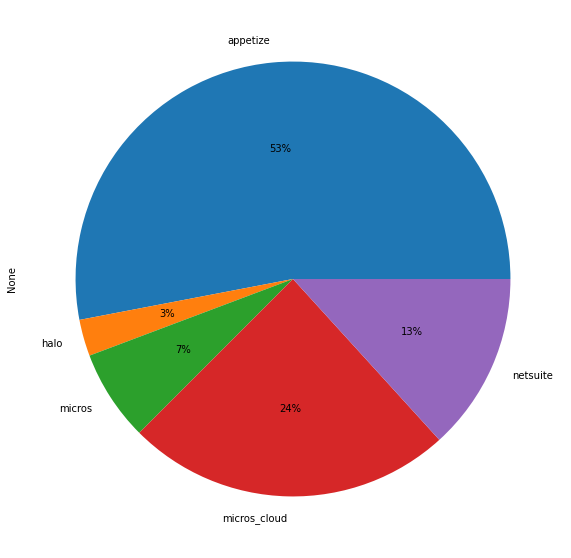

In [ ]:
df1.groupby(['source_system']).size().plot(kind='pie',autopct='%1.0f%%',figsize=(10,10))

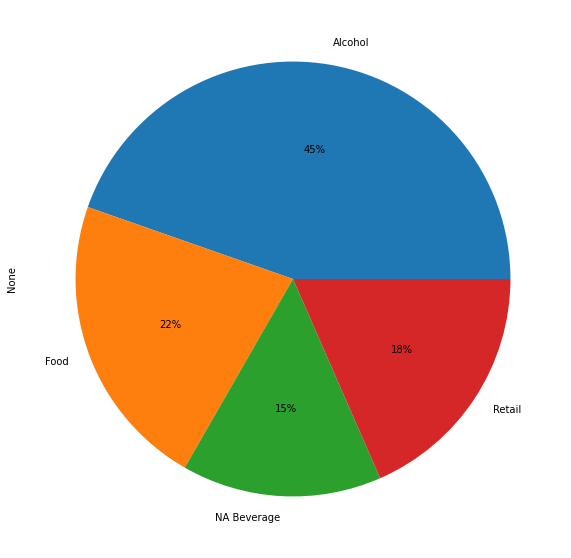

In [ ]:
df1.groupby(['Product - Cat 0']).size().plot(kind='pie',autopct='%1.0f%%',figsize=(10,10))


In [ ]:
df1.groupby(['Product - Cat 0'])['qty'].mean().sort_values(ascending=False)

Product - Cat 0
Food           25.746104
NA Beverage    24.534772
Alcohol        18.624403
Retail          4.667441
Name: qty, dtype: float64

In [ ]:
AlcoholDF = df1[df1['Product - Cat 0'] == 'Alcohol']
FoodDF = df1[df1['Product - Cat 0'] == 'Food']
NABevDF = df1[df1['Product - Cat 0'] == 'NA Beverage']
RetailDF = df1[df1['Product - Cat 0'] == 'Retail']

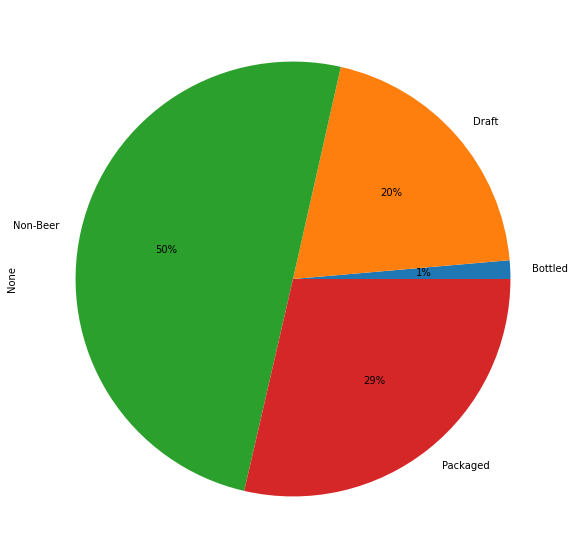

In [ ]:
AlcoholDF.groupby(['Product - Cat 1']).size().plot(kind='pie',autopct='%1.0f%%',figsize=(10,10))

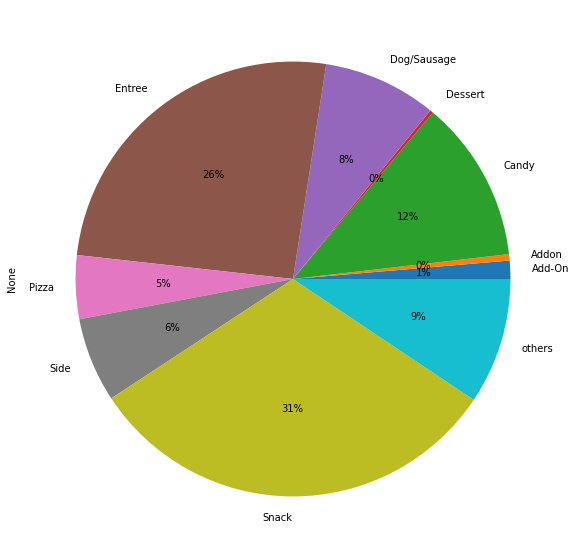

In [ ]:
FoodDF.groupby(['Product - Cat 1']).size().plot(kind='pie',autopct='%1.0f%%',figsize=(10,10))

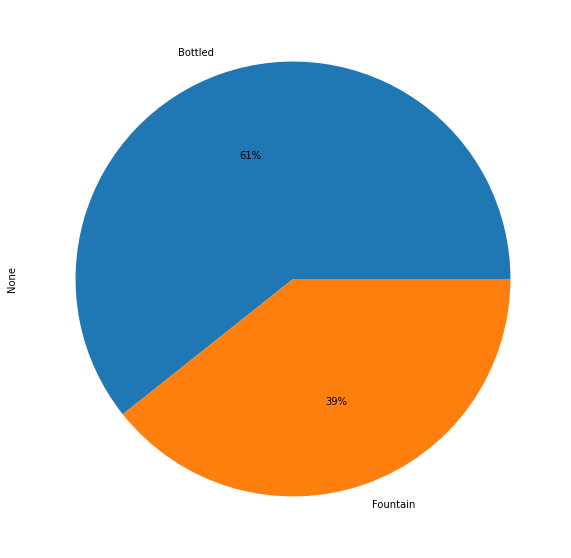

In [ ]:
NABevDF.groupby(['Product - Cat 1']).size().plot(kind='pie',autopct='%1.0f%%',figsize=(10,10))

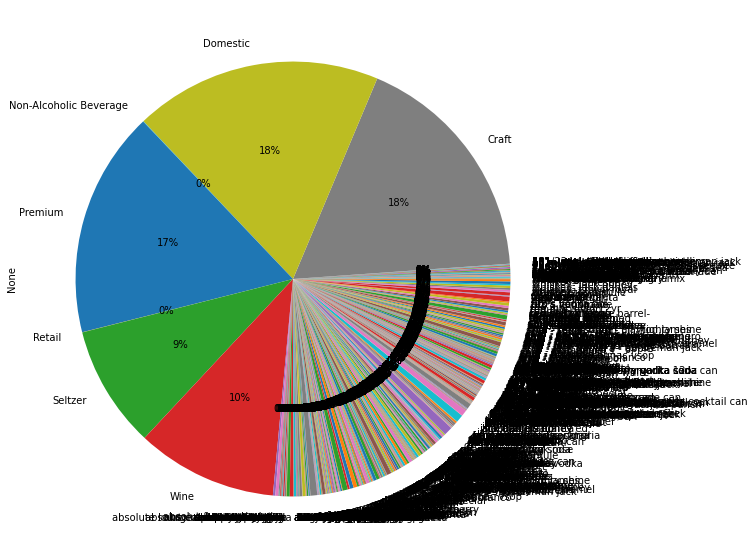

In [ ]:
AlcoholDF.groupby(['Product - Cat 2']).size().plot(kind='pie',autopct='%1.0f%%',figsize=(10,10)) # retail ?

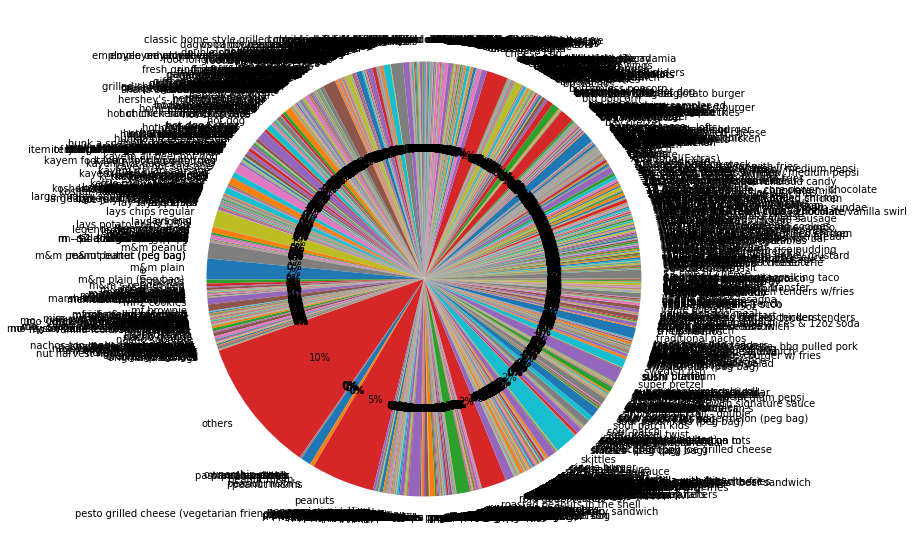

In [ ]:
FoodDF.groupby(['Product - Cat 2']).size().plot(kind='pie',autopct='%1.0f%%',figsize=(10,10))

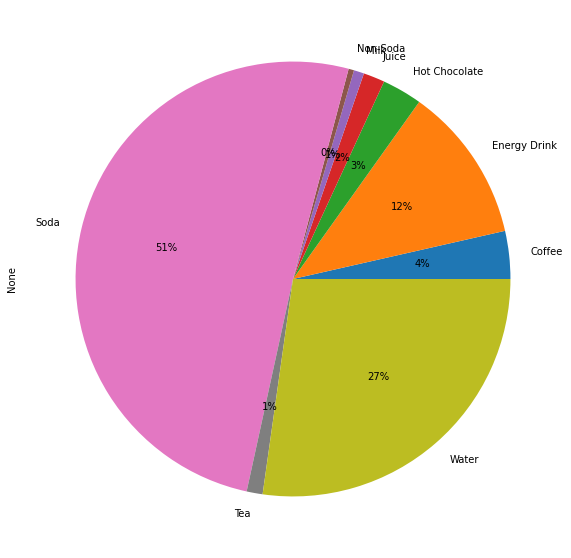

In [ ]:
NABevDF.groupby(['Product - Cat 2']).size().plot(kind='pie',autopct='%1.0f%%',figsize=(10,10))

In [ ]:
df1=df1.dropna(subset=['Activity']).reset_index(drop=True)

In [ ]:
events = df1['Activity'].unique()
len(events)

25

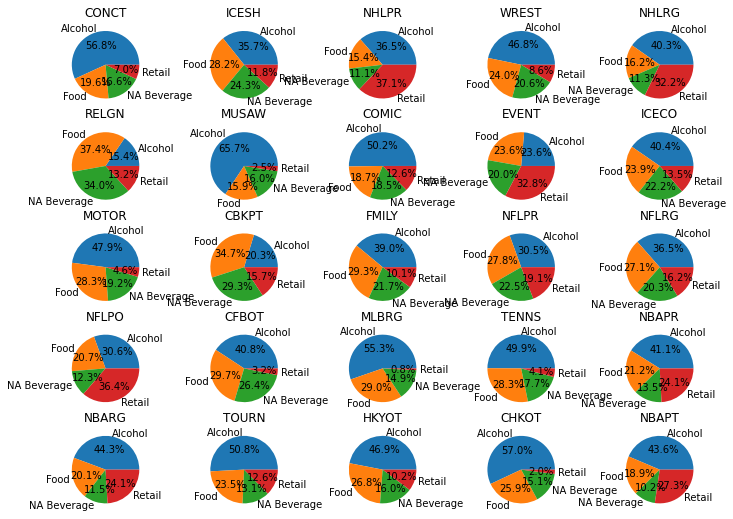

In [ ]:
i = 0
r = 0
c = 0
labels = []
fig = plt.figure(figsize=(12,9))

for event in events:
  #print(event)
  #print(len(df1[df1["Event - Type Category"] == event]["Product - Cat 0"].unique()))

  if len(df1[df1["Activity"] == event]["Product - Cat 0"].unique()) == 4:
    labels = ['Alcohol','Food','NA Beverage','Retail']
  else:
    labels = ['Alcohol','Food','NA Beverage']

  ax1 = plt.subplot2grid((5,5),(r,c))
  plt.pie(df1[df1["Activity"] == event].groupby(["Product - Cat 0"]).size(),labels=labels,autopct='%1.1f%%')
  plt.title(event)

  i += 1
  c += 1
  if i % 5 == 0:
    r += 1
    c = 0

plt.show()


In [ ]:
df1.groupby(['Activity'])['amount'].mean().sort_values(ascending=False)

Activity
CFBOT    503.293551
NFLPO    361.681580
MLBRG    335.320372
NFLRG    321.487996
TENNS    309.310838
MOTOR    295.822986
EVENT    294.131553
NFLPR    240.731012
HKYOT    219.066837
CHKOT    217.789638
TOURN    215.810456
CONCT    185.275515
NBAPT    175.022562
NBARG    168.391657
WREST    151.655854
NHLRG    150.954259
FMILY    144.990761
ICESH    143.498317
NBAPR    130.698444
NHLPR    115.821245
MUSAW    111.163882
CBKPT     93.024810
ICECO     84.472567
COMIC     78.096455
RELGN     67.440730
Name: amount, dtype: float64

In [ ]:
df1.groupby(['Product - Cat 0'])['amount'].mean().sort_values(ascending=False)

Product - Cat 0
Food           274.264629
Alcohol        263.387994
NA Beverage    145.816171
Retail         134.677113
Name: amount, dtype: float64

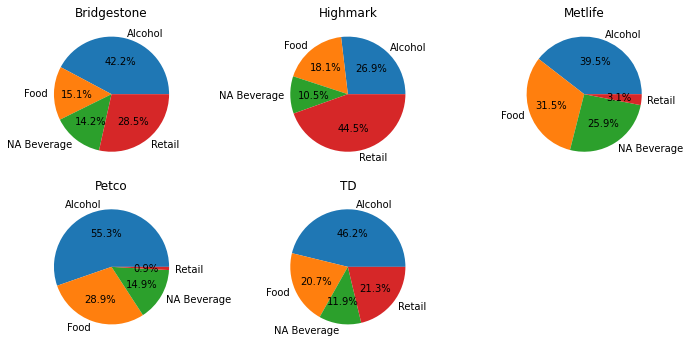

In [ ]:
i = 0
r = 0
c = 0

labels = ['Alcohol','Food','NA Beverage','Retail']
fig = plt.figure(figsize=(12,9))
locations = df1['TH_Loc'].unique()

for location in locations:
  ax1 = plt.subplot2grid((3,3),(r,c))
  plt.pie(df1[df1["TH_Loc"] == location].groupby(["Product - Cat 0"]).size(),labels=labels,autopct='%1.1f%%')
  plt.title(location)

  i += 1
  c += 1
  if i % 3 == 0:
    r += 1
    c = 0

plt.show()

In [ ]:
df1.groupby(['TH_Loc'])['amount'].mean().sort_values(ascending=False)

TH_Loc
Petco          343.391565
Highmark       340.340685
Metlife        309.891308
TD             186.002484
Bridgestone    113.374550
Name: amount, dtype: float64